In [2]:
import numpy as np
import pickle 

vectors_array=np.loadtxt('user_glove_vecs').view(float)

with open("Pickle_Files/vec_word_list", "rb") as fp:   # Unpickling
    vec_word_list= pickle.load(fp)
    
with open("Pickle_Files/vec_total_tokens", "rb") as fp:   # Unpickling
    vec_total_tokens= pickle.load(fp)
    
filename = 'Pickle_Files/gl_model'
glove_model = pickle.load(open(filename, 'rb'))

In [3]:
import pickle 
from sklearn.cluster import KMeans

num_clusters = 20

km = KMeans(n_clusters=num_clusters)

%time km.fit(vectors_array)

clusters = km.labels_.tolist()
kmcenters=km.cluster_centers_
pickle.dump(km,open('Pickle_Files/KmeansModel','wb'))

"""
To load model: 
filename = 'Pickle_Files/KmeansModel'
loaded_model = pickle.load(open(filename, 'rb'))"""

CPU times: user 27.8 s, sys: 5.62 s, total: 33.4 s
Wall time: 32.2 s


"\nTo load model: \nfilename = 'Pickle_Files/KmeansModel'\nloaded_model = pickle.load(open(filename, 'rb'))"

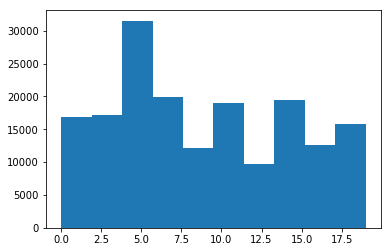

In [4]:
import matplotlib.pyplot as plt
plt.hist(clusters)
plt.show()

In [5]:
from scipy.spatial.distance import cdist

Y=cdist(vectors_array,kmcenters,'cosine')

In [6]:
Z=np.argsort(Y,axis=0)
wordlist=[vec_word_list[i] for i in Z[1000:1003,10].tolist()]
wordlist

['e.g.', 'beneficial', 'beneficial']

In [7]:
[vec_word_list[i] for i in Z[0,:].tolist()]

['love',
 'co',
 'faith',
 'government',
 'gatekeeper',
 'think',
 'new',
 'next',
 'y',
 'out',
 'demonstrated',
 'business',
 'est',
 'king',
 'amp',
 'thought',
 'wrap',
 's',
 'understand',
 'g']

In [12]:
import numpy as np
km.predict(np.asarray(glove_model['matter']).reshape(1,-1))

array([5], dtype=int32)

In [13]:
from collections import Counter
ct=Counter(clusters)
print(ct)
i=0
weight=np.maximum(1-cdist(np.asarray([glove_model[word] for word in vec_total_tokens[i]]),kmcenters,'cosine'),0)
w_topic=np.sum(weight,axis=0)
prob_topic=w_topic/np.sum(w_topic)
prob_topic

Counter({5: 21424, 15: 13206, 1: 11033, 4: 10094, 7: 9917, 6: 9917, 18: 9713, 10: 9538, 11: 9442, 9: 9273, 3: 8700, 2: 8437, 16: 7946, 13: 7864, 14: 6211, 19: 6017, 0: 5808, 17: 4609, 8: 2813, 12: 1819})


array([ 0.05955586,  0.04384321,  0.06121107,  0.05026624,  0.02063734,
        0.06421988,  0.06075063,  0.06260933,  0.02590751,  0.06301529,
        0.04360504,  0.0581931 ,  0.00577878,  0.05705267,  0.04969409,
        0.06302493,  0.05682048,  0.0454371 ,  0.06123338,  0.04714406])

In [14]:
vec_total_tokens[0]

['effectively',
 'accomplice',
 'throw',
 'fucker',
 'jail',
 'look',
 'back',
 'co',
 'pd',
 'surprisingly',
 'entertaining',
 'ayah',
 'unacknowledged',
 'thank',
 'excuse',
 'frankness',
 'look',
 'lot',
 'older',
 'yr',
 'age',
 'pp',
 'developed',
 'country',
 'uneducated',
 'basic',
 'science',
 'utterly',
 'cloud',
 'formation',
 'late',
 'afternoon',
 'co',
 'bbc',
 'bbcr',
 'ado',
 'head',
 'sublime',
 'indeed',
 'say',
 'pocket',
 'say',
 'manifold',
 'fabric',
 'space',
 'time',
 'velociraptor',
 'assumption',
 'required',
 'provide',
 'spade',
 'noted',
 'hitch',
 'sadly',
 'co',
 'p',
 'my',
 'rid',
 'abide',
 'hope',
 'prove',
 'efficacious',
 'lark',
 'fact',
 'support',
 'emotional',
 'frame',
 'mind',
 'rather',
 'objective',
 'reality',
 'foundation',
 'stone',
 'religious',
 'amp',
 'truth',
 'matter',
 'feel',
 'good',
 'matter',
 'true',
 'saga',
 'may',
 'keg',
 'inderdaad',
 'abide',
 'wine',
 'intake',
 'information',
 'retention',
 'suspect',
 'non',
 'creative

In [15]:
clust_list=[]
start_ind=0
for i in range(len(vec_total_tokens)):
    l=len(vec_total_tokens[i])
    fin=start_ind+l
    clust_list.append(clusters[start_ind:fin])
    start_in=finclust_freq_dict=[]
    
clust_freq_dict=[]
for i in range(len(clust_list)):
    clust_freq_dict.append(Counter(clust_list[i]))
f,_=np.histogram(clust_list[2],bins=np.array(range(20)))
f

array([18, 15,  8,  3, 17, 22,  7, 12,  5, 14, 21, 26,  3, 12,  8, 17, 16,
        6, 38])

In [16]:
[vec_word_list[i] for i in Z[0,:].tolist()]

['love',
 'co',
 'faith',
 'government',
 'gatekeeper',
 'think',
 'new',
 'next',
 'y',
 'out',
 'demonstrated',
 'business',
 'est',
 'king',
 'amp',
 'thought',
 'wrap',
 's',
 'understand',
 'g']